In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [ ]:
raw_csv_data = pd.read_csv("/content/AirPassengers (1).csv")
df_comp=raw_csv_data.copy()
df_comp['Month'] = pd.to_datetime(df_comp['Month'],
                                      format="%Y-%m",dayfirst=True)
df_comp.set_index('Month', inplace=True)


In [ ]:
df_comp.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [ ]:
df_comp

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


#WHITE NOISE

In [ ]:
wn = np.random.normal(loc = df_comp.Passengers.mean(), scale = df_comp.Passengers.std(), size = len(df_comp))

In [ ]:
df_comp['wn'] = wn

In [ ]:
df_comp

,Passengers,wn
Month,,
1949-01-01,112,206.543345
1949-02-01,118,192.478280
1949-03-01,132,132.714164
1949-04-01,129,365.554259
1949-05-01,121,197.207071
...,...,...
1960-08-01,606,476.111278
1960-09-01,508,280.764513
1960-10-01,461,378.713541


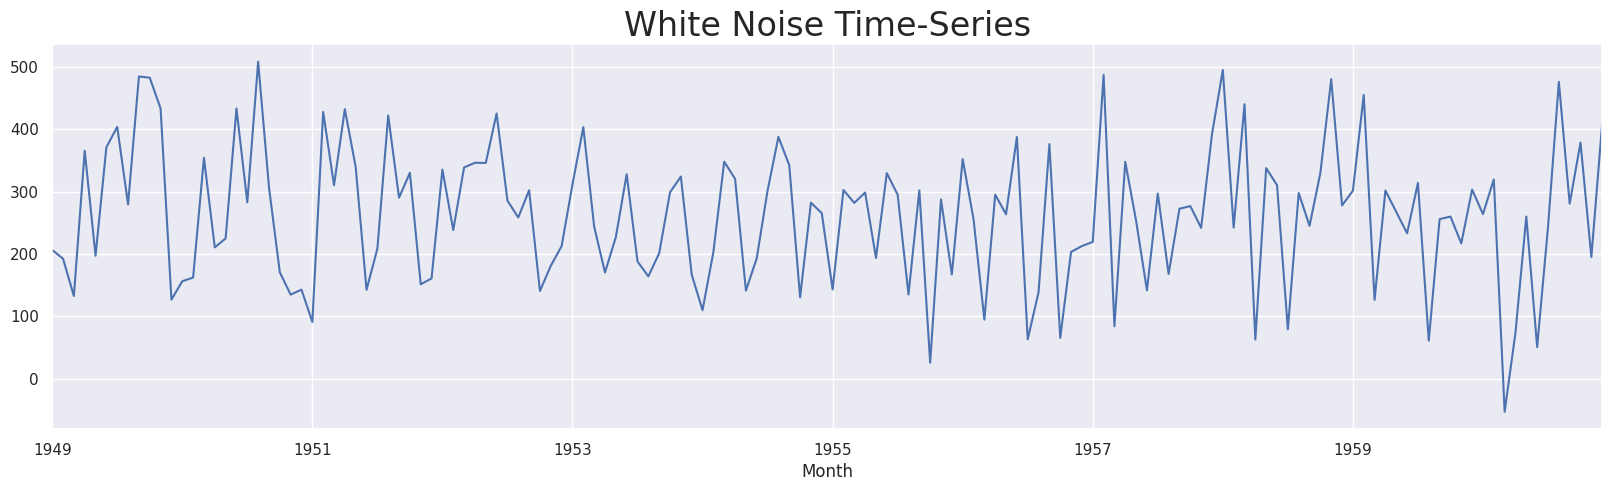

In [ ]:
df_comp.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

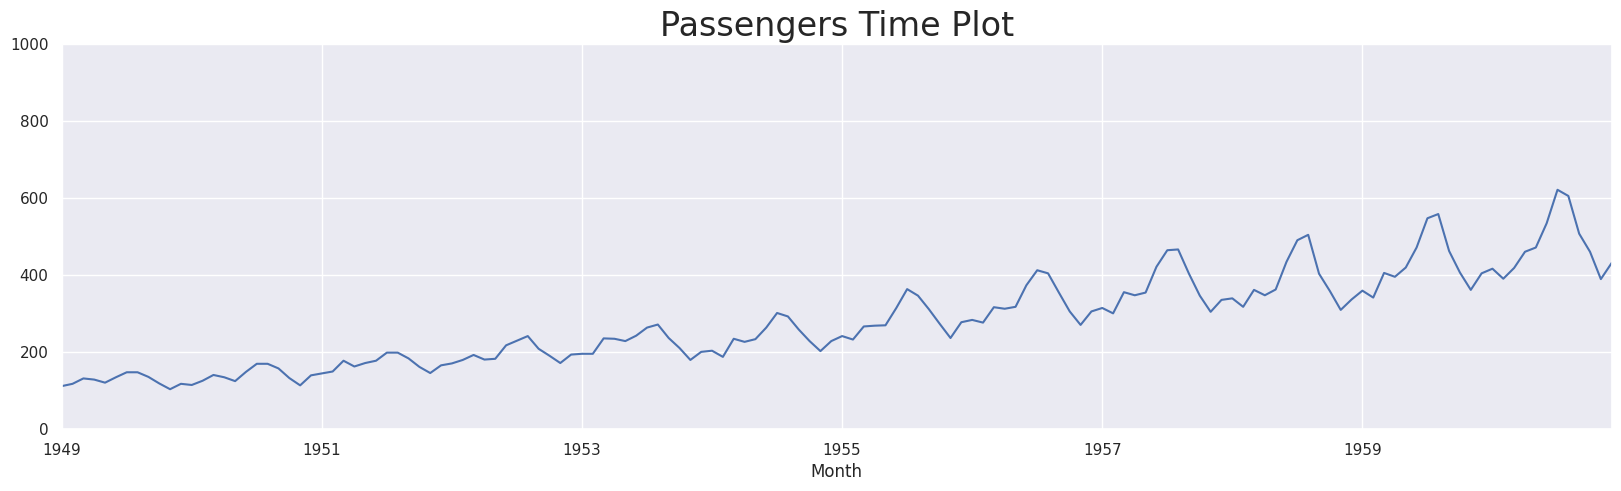

In [ ]:
df_comp.Passengers.plot(figsize=(20,5))
plt.title("Passengers Time Plot", size = 24)
plt.ylim(0,1000)
plt.show()

#STATIONARITY

In [ ]:
sts.adfuller(df_comp.Passengers)

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
sts.adfuller(df_comp.wn)

(-11.891257134473236,
 5.861338443124943e-22,
 0,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 1587.9405885202789)

#Seasonality Decompose

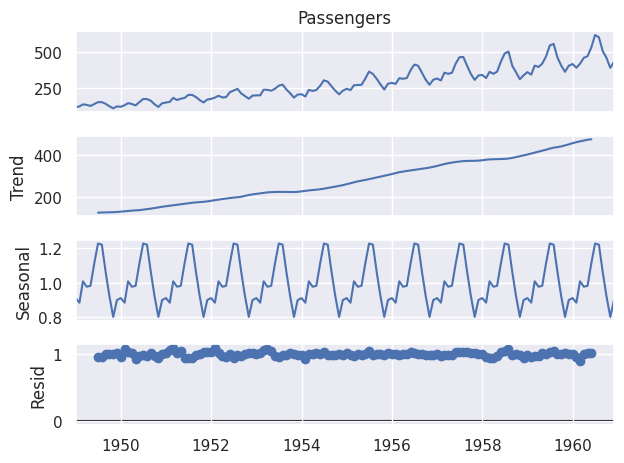

In [ ]:
s_dec_multiplicative = seasonal_decompose(df_comp.Passengers, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

#SEASONAL PLOT

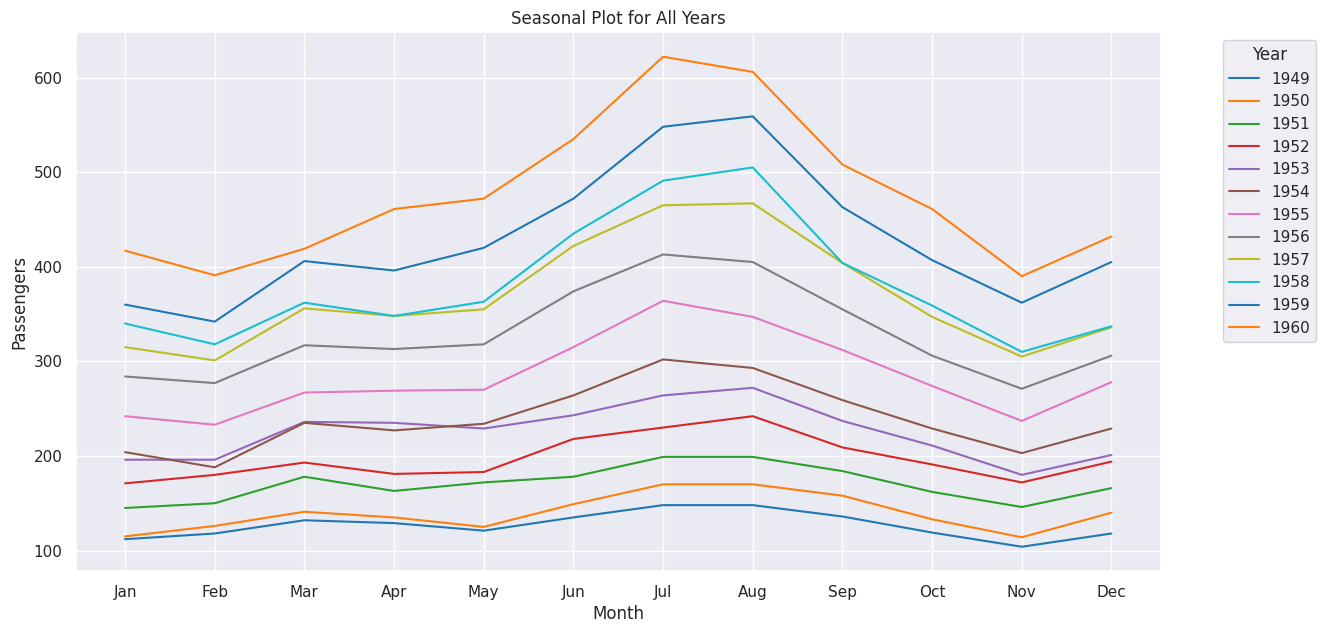

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/AirPassengers (1).csv'
df = pd.read_csv(file_path)

# Convert the Month column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Extract the year and month from the datetime
df['year'] = df['Month'].dt.year
df['month'] = df['Month'].dt.month

# Plot the seasonal plot for all years
plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='#Passengers', hue='year', data=df, palette='tab10')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Seasonal Plot for All Years')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#SEASONAL SUBSERIES PLOT




<Figure size 1400x800 with 0 Axes>

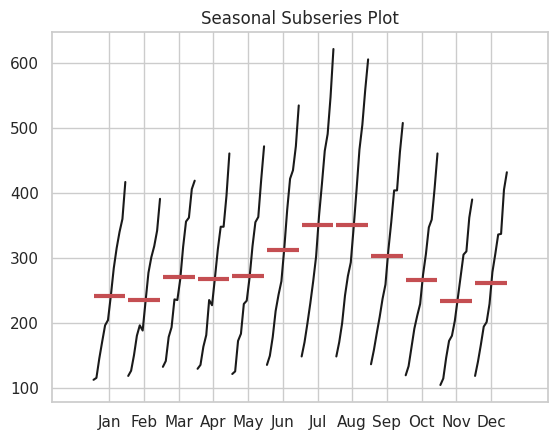

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
file_path = '/content/AirPassengers (1).csv'
df = pd.read_csv(file_path)

# Convert the Month column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Set the Month column as the index
df.set_index('Month', inplace=True)

# Create the monthplot
plt.figure(figsize=(14, 8))
sm.graphics.tsa.month_plot(df['#Passengers'])
plt.title('Seasonal Subseries Plot')
plt.show()


#LINEAR REGRESSION

Train RMSE: 47.30779756821161
Test RMSE: 39.56442386858939
Train R^2: 0.8537695870418689
Test R^2: 0.8424778356929681


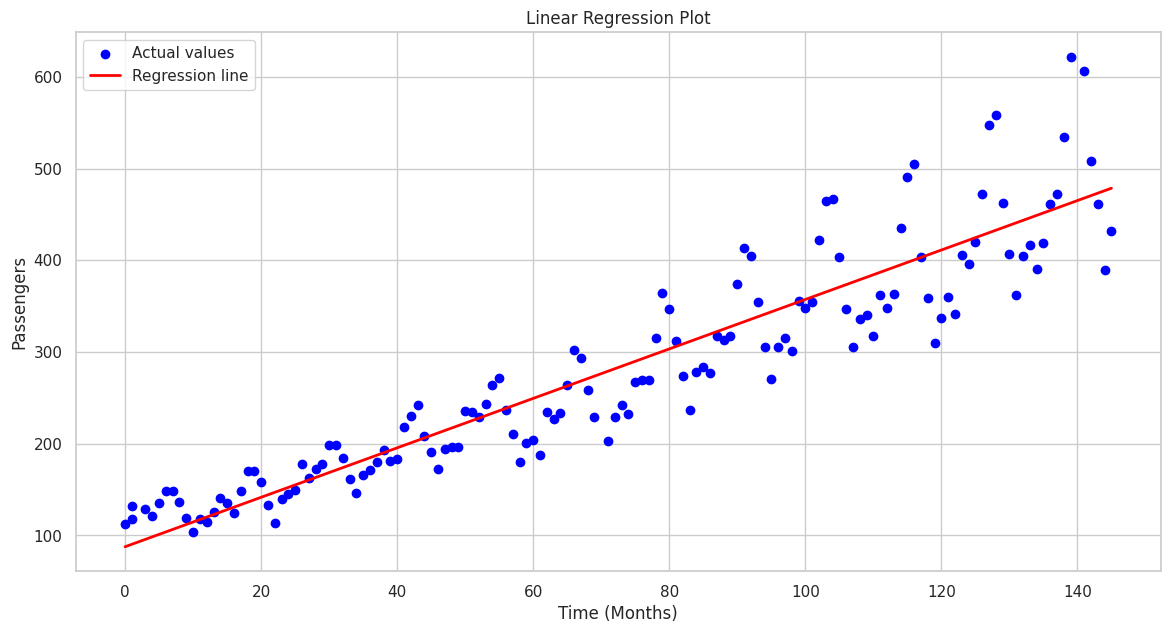

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = '/content/AirPassengers (1).csv'
df = pd.read_csv(file_path)

# Convert the Month column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Create a new column for the time in months since the start
df['Time'] = (df['Month'] - df['Month'].min()).dt.days // 30

# Features and target
X = df[['Time']]
y = df['#Passengers']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train R^2: {train_r2}')
print(f'Test R^2: {test_r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='blue', label='Actual values')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Time (Months)')
plt.ylabel('Passengers')
plt.title('Linear Regression Plot')
plt.legend()
plt.grid(True)
plt.show()


#NEURAL NETWORKS

Epoch 1/20
87/87 [==============================] - 6s 13ms/step - loss: 0.0113
Epoch 2/20
87/87 [==============================] - 1s 9ms/step - loss: 0.0056
Epoch 3/20
87/87 [==============================] - 1s 8ms/step - loss: 0.0053
Epoch 4/20
87/87 [==============================] - 1s 9ms/step - loss: 0.0071
Epoch 5/20
87/87 [==============================] - 1s 9ms/step - loss: 0.0052
Epoch 6/20
87/87 [==============================] - 1s 9ms/step - loss: 0.0046
Epoch 7/20
87/87 [==============================] - 1s 9ms/step - loss: 0.0061
Epoch 8/20
87/87 [==============================] - 1s 9ms/step - loss: 0.0059
Epoch 9/20
87/87 [==============================] - 1s 9ms/step - loss: 0.0051
Epoch 10/20
87/87 [==============================] - 1s 9ms/step - loss: 0.0046
Epoch 11/20
87/87 [==============================] - 1s 9ms/step - loss: 0.0040
Epoch 12/20
87/87 [==============================] - 1s 8ms/step - loss: 0.0034
Epoch 13/20
87/87 [=============================

ValueError: x and y must have same first dimension, but have shapes (33,) and (44, 1)

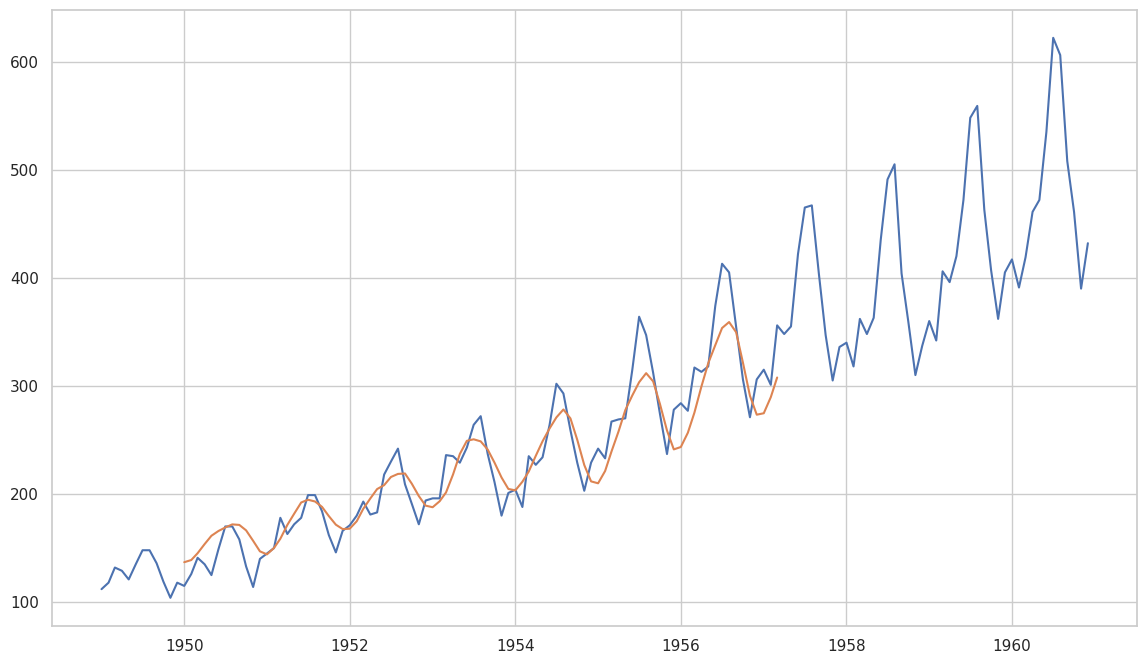

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the data
file_path = 'AirPassengers (1).csv'
df = pd.read_csv(file_path)

# Convert the Month column to datetime format and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df['#Passengers'] = scaler.fit_transform(df['#Passengers'].values.reshape(-1, 1))

# Prepare the data for the neural network
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Set the time step
time_step = 12
data = df['#Passengers'].values
data = data.reshape(-1, 1)

# Create the dataset
X, Y = create_dataset(data, time_step)

# Split the data into training and testing sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Reshape the data to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=20)

# Predicting using the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(df.index, scaler.inverse_transform(df['#Passengers'].values.reshape(-1, 1)), label='Original data')

# Adjust the index for train and test predictions
train_predict_index = df.index[time_step:train_size + time_step]
test_predict_index = df.index[train_size + (time_step * 2):len(df)]

plt.plot(train_predict_index, train_predict, label='Training predictions')
plt.plot(test_predict_index, test_predict, label='Testing predictions')

plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
